In [1]:
import csv
import ast
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
from sklearn import svm

In [3]:
from sklearn.neural_network import MLPClassifier

In [4]:
import collections

In [5]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score

In [26]:
features_key = "features"
label_key = "label"
csv_file_path = 'num_recognition_training_data.csv'

def get_csv_data():
        train_labels = []
        train_features = []
        with open(csv_file_path) as csvfile:
            data_reader = csv.reader(csvfile, delimiter=',')
            for row in data_reader:
                train_labels.append(row[0])
                features = ast.literal_eval(row[1])
                train_features.append(features)

        return {
            label_key: train_labels,
            features_key: train_features
        }

In [33]:
csv_data = get_csv_data()
labels = csv_data[label_key]
features = csv_data[features_key]

In [34]:
def train_data(labels, features, solver='svm', **kwargs):
    
    if solver == 'svm':
        classifier = svm.SVC(**kwargs)
    else:
        print('using other than SVC')
        classifier = MLPClassifier()
        
    classifier.fit(features, labels)
    
    return classifier

In [35]:
def cross_validate(classifier, to_predict_features, to_predict_labels):
    # make prediction
    prediction = classifier.predict(to_predict_features)
    
    # check validity
    return confusion_matrix(to_predict_labels, prediction), \
        classification_report(to_predict_labels, prediction), \
        f1_score(to_predict_labels, prediction, average='macro')

In [46]:
def make_model(labels, features, solver='svm'):
    # convert to numpy array
    labels = np.array(labels, dtype='uint8')
    features = np.array(features, dtype='float_')
    
    # this one to converts everything become 2 class
    labels = (labels==6).astype(int)
    
    # create random state to maintain randomness
    rs = np.random.RandomState(seed=46542)
    
    # randomize the data
    rs.shuffle(labels)
    rs.shuffle(features)
    
    print(np.unique(labels))

    total_test = len(labels) // 2
    
    # check occurences
    test_occ = sorted(collections.Counter(labels[:total_test]).items())
    cv_occ = sorted(collections.Counter(labels[total_test:]).items())
    
    print('Train labels: {}\nCV    labels: {}\n\n'.format(test_occ, cv_occ))
    
    # svm
    if solver == 'svm':
        costs = np.linspace(10, 100, num=2) 
        gammas = np.linspace(0.001, 0.1, num=50)
        scores = []
        
        for cost in costs:
            for gamma in gammas:
                classifier = train_data(labels[:total_test], features[:total_test], solver='svm', C=cost, gamma=gamma)

                matrix, report, f1_score = cross_validate(classifier, features[total_test:], labels[total_test:])
                scores.append((cost, gamma, f1_score))
                print('Cost: {}\nGamma: {}\nScore: {}\n\n'.format(cost, gamma, f1_score))
#                 print(matrix)
#                 print('\n')
                print(report)
    
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
    
        x, y, z = zip(*scores)

        ax.scatter(x, y, z, c='r', marker='o')

        ax.set_xlabel('C')
        ax.set_ylabel('Gamma')
        ax.set_zlabel('F1_score')

        plt.show()
        
    else:
        # Neural network
        classifier = train_data(features[:total_test], labels[:total_test], solver='nn')
        matrix, report, f1_score = cross_validate(classifier, features[total_test:], labels[total_test:])
        print(matrix)
        print('\n')
        print(report)

['5', '2', '2', '2', '4']
[0 1]
Train labels: [(0, 366), (1, 34)]
CV    labels: [(0, 360), (1, 40)]


Cost: 10.0
Gamma: 0.001
Score: 0.4736842105263158


             precision    recall  f1-score   support

          0       0.90      1.00      0.95       360
          1       0.00      0.00      0.00        40

avg / total       0.81      0.90      0.85       400

Cost: 10.0
Gamma: 0.0030204081632653063
Score: 0.4736842105263158


             precision    recall  f1-score   support

          0       0.90      1.00      0.95       360
          1       0.00      0.00      0.00        40

avg / total       0.81      0.90      0.85       400

Cost: 10.0
Gamma: 0.0050408163265306125
Score: 0.4736842105263158


             precision    recall  f1-score   support

          0       0.90      1.00      0.95       360
          1       0.00      0.00      0.00        40

avg / total       0.81      0.90      0.85       400

Cost: 10.0
Gamma: 0.007061224489795919
Score: 0.4736842105263158


D:\Anaconda\envs\numrecognition\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda\envs\numrecognition\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Cost: 10.0
Gamma: 0.009081632653061226
Score: 0.4736842105263158


             precision    recall  f1-score   support

          0       0.90      1.00      0.95       360
          1       0.00      0.00      0.00        40

avg / total       0.81      0.90      0.85       400

Cost: 10.0
Gamma: 0.011102040816326531
Score: 0.4736842105263158


             precision    recall  f1-score   support

          0       0.90      1.00      0.95       360
          1       0.00      0.00      0.00        40

avg / total       0.81      0.90      0.85       400

Cost: 10.0
Gamma: 0.013122448979591837
Score: 0.4736842105263158


             precision    recall  f1-score   support

          0       0.90      1.00      0.95       360
          1       0.00      0.00      0.00        40

avg / total       0.81      0.90      0.85       400

Cost: 10.0
Gamma: 0.015142857142857145
Score: 0.4736842105263158


             precision    recall  f1-score   support

          0       0.90      1.00 

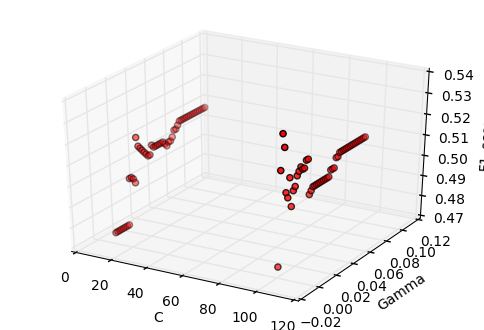

In [47]:
print(labels[:5])
make_model(labels, features, 'svm')